In [10]:
plt.rcParams["text.usetex"] = True

/var/folders/_s/6dth5vq92x592870nqdgg1v40000gn/T/ipykernel_88917/2256060140.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


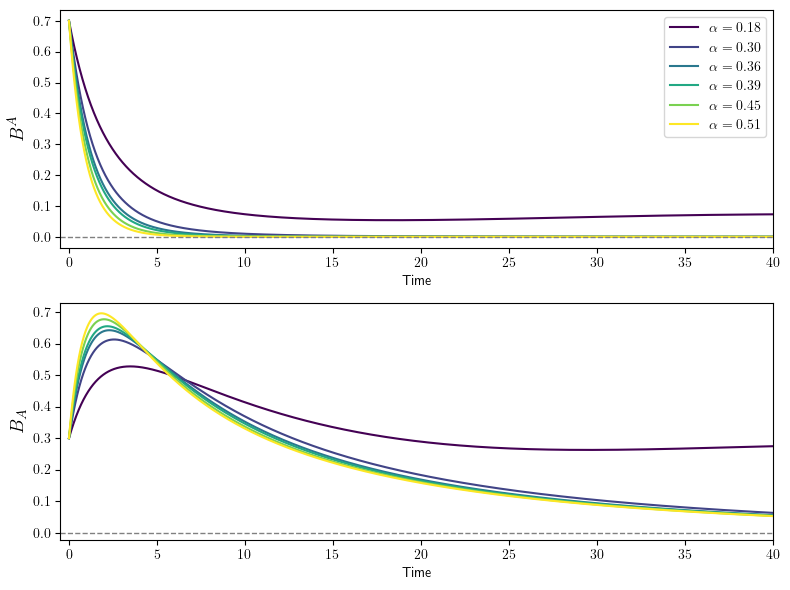

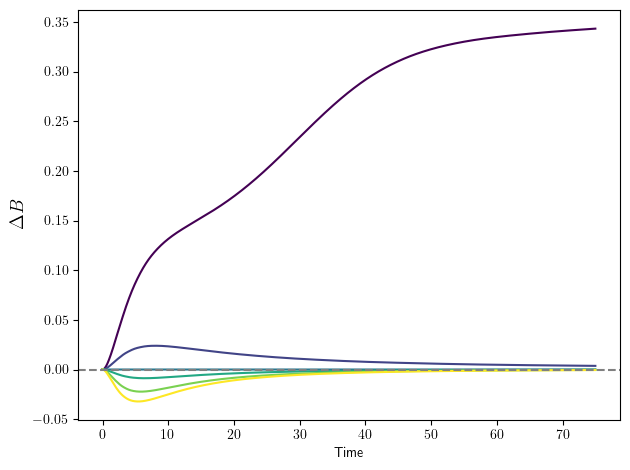

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.cm as cm

# parameters
rho1, rho2 = 0.6, 0.125
CC, A = 0.887, 2
alpha1, delta_base = 0.3, 0.25
x0 = np.array([0.7, 0.3])
t_span = (0, 75)
t_eval = np.linspace(*t_span, 200000)

def ode_x(t, x, rho1, rho2, alpha1, delta2, CC, A):
    BA = x.sum()
    dx1 = rho1*x[0]*(1-BA/CC) - alpha1*A*x[0]
    dx2 = rho2*x[1]*(1-BA/CC) + alpha1*A*x[0] - delta2*(A/(1+A))*x[1]
    return [dx1, dx2]

# Unique alpha values
alphas = [alpha1 * f for f in [0.6, 1.0, 1.2, 1.3, 1.5, 1.7]]
labels = [fr'$\alpha = {a:.2f}$' for a in alphas]

# Use a colormap
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(alphas))]

# Solve ODEs
sols = []
for alpha in alphas:
    sol = solve_ivp(ode_x, t_span, x0, t_eval=t_eval,
                    args=(rho1, rho2, alpha, delta_base, CC, A))
    sols.append(sol)

# 1) Orbits in phase‐plane
# 2) Time evolution of B^A and B_A in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Top plot: B^A
for sol, lab, c in zip(sols, labels, colors):
    ax1.plot(sol.t, sol.y[0], color=c, label=lab, linewidth=1.5)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlabel('Time', fontsize=10)
ax1.set_ylabel(r'$B^A$', fontsize=14)
ax1.set_xlim(-0.5, 20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.legend()
#ax1.grid(True, linestyle='--', alpha=0.4)

# Bottom plot: B_A
for sol, lab, c in zip(sols, labels, colors):
    ax2.plot(sol.t, sol.y[1], color=c, label=lab, linewidth=1.5)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_xlabel('Time', fontsize=10)
ax2.set_ylabel(r'$B_A$', fontsize=14)
ax2.set_xlim(-0.5, 40)
ax1.tick_params(labelbottom=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#ax2.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('time_evolution_subplots_case2.pdf')
plt.show()


# 2) Finite difference in total bacteria
B_base = sols[2].y[0] + sols[2].y[1]
plt.figure()
for sol, lab, c in zip(sols, labels, colors):
    B = sol.y[0] + sol.y[1]
    plt.plot(sol.t, B - B_base, color=c, label=f'ΔB for {lab}', linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time', fontsize=10)
plt.ylabel(r'$\Delta B$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.legend()
#plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('orbits_gradient_alpha_case2.pdf')
plt.show()


/var/folders/_s/6dth5vq92x592870nqdgg1v40000gn/T/ipykernel_88917/3564368794.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


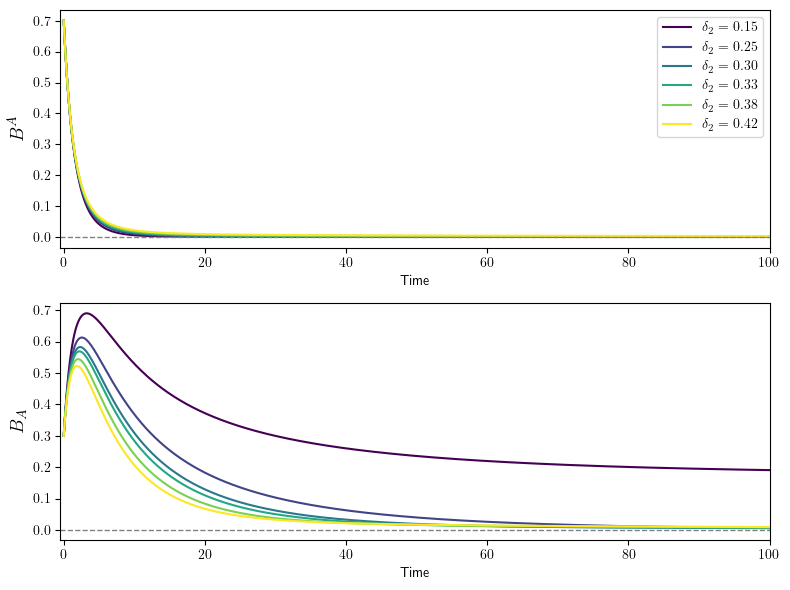

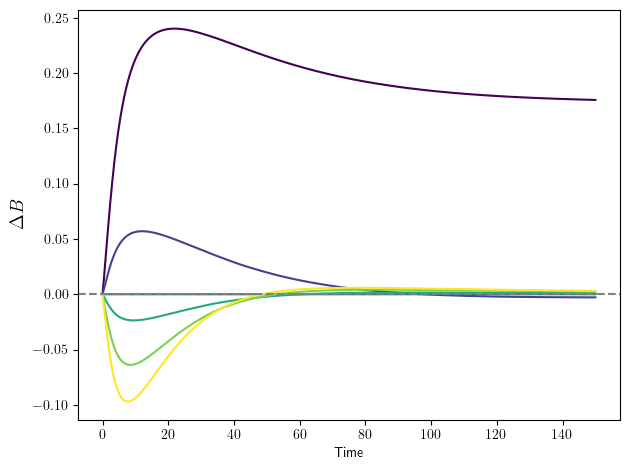

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# parameters
rho1, rho2 = 0.6, 0.125
CC, A = 0.887, 2
alpha1, delta_base = 0.3, 0.25
x0 = np.array([0.7, 0.3])
t_span = (0, 150)
t_eval = np.linspace(*t_span, 2000)

def ode_x(t, x, rho1, rho2, alpha1, delta2, CC, A):
    BA = x.sum()
    dx1 = rho1*x[0]*(1-BA/CC) - alpha1*A*x[0]
    dx2 = rho2*x[1]*(1-BA/CC) + alpha1*A*x[0] - delta2*(A/(1+A))*x[1]
    return [dx1, dx2]

# prepare deltas ±20%
deltas = [delta_base * f for f in [0.6, 1.0, 1.2, 1.3, 1.5, 1.7]]
labels = [fr'$\delta_2 = {a:.2f}$' for a in deltas]

cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(deltas))]

# Solve ODEs
sols = []
for delta in deltas:
    sol = solve_ivp(ode_x, t_span, x0, t_eval=t_eval,
                    args=(rho1, rho2, alpha1, delta, CC, A))
    sols.append(sol)

# 1) Orbits in phase‐plane
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Top plot: B^A
for sol, lab, c in zip(sols, labels, colors):
    ax1.plot(sol.t, sol.y[0], color=c, label=lab, linewidth=1.5)
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
ax1.set_xlabel('Time', fontsize=10)
ax1.set_ylabel(r'$B^A$', fontsize=14)
ax1.set_xlim(-0.5, 20)
ax1.tick_params(labelbottom=True)
ax1.legend()
#ax1.grid(True, linestyle='--', alpha=0.4)

# Bottom plot: B_A
for sol, lab, c in zip(sols, labels, colors):
    ax2.plot(sol.t, sol.y[1], color=c, label=lab, linewidth=1.5)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_xlabel('Time', fontsize=10)
ax2.set_ylabel(r'$B_A$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax2.set_xlim(-0.5, 100)

#ax2.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('time_evolution_subplots_delta_case2.pdf')
plt.show()

# 2) Finite difference in total bacteria
B_base = sols[2].y[0] + sols[2].y[1]
plt.figure()
for sol, lab, c in zip(sols, labels, colors):
    B = sol.y[0] + sol.y[1]
    plt.plot(sol.t, B - B_base, color=c, label=f'ΔB for {lab}', linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time', fontsize=10)
plt.ylabel(r'$\Delta B$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.legend()
#plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('orbits_gradient_delta_case2.pdf')
plt.show()
